# Image Classification (using decision tree)

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#load_data
train_data = pd.read_csv('trainn.csv')
test_data = pd.read_csv('testt.csv')

In [94]:
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
print('Training data shape: ',train_data.shape)
print('Test data shape: ', test_data.shape)

Training data shape:  (42000, 785)
Test data shape:  (28000, 784)


In [96]:
X = train_data.drop(['label'], axis = 1).values
y =train_data[['label']].values

In [97]:
print('Number of pixels : ', len(X[0]))
print('Shape : ',X[0].shape)
X[0]

Number of pixels :  784
Shape :  (784,)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 123, 248, 253, 167,
        10,   0

In [98]:
X[0].reshape([28,28])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 123, 248

we will use numpy to see properly we can use print also

In [99]:
# np.set_printoptions(linewidth = 200)

In [100]:
print(X[7].reshape([28,28]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  21 130 190 254 254 250 175 135  96  96  16   4   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  26 102 186 254 254 248 222 222 225 254 254 254 254 254 206 112   4   0   0   0   0   0]
 [  0   0   0   0   0   0 207 254 254 177 117  39   0   0  56 248 102  48  48 10

In [101]:
print(X[10].reshape([28,28]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   7  24  24  97 253 253 253 253 255 180  48   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  30 186 252 252 253 252 252 252 252 253 252 227  29   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38 155 252 252 252 253 252 252 227  7

To see image we will use matplot

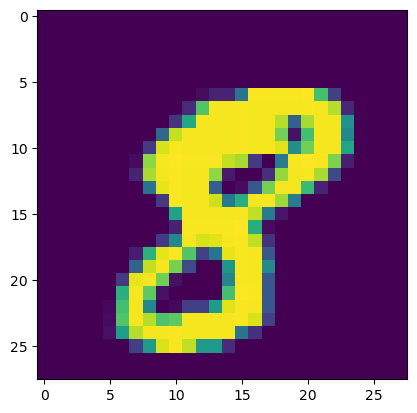

In [102]:
plt.imshow(X[10].reshape([28,28]))

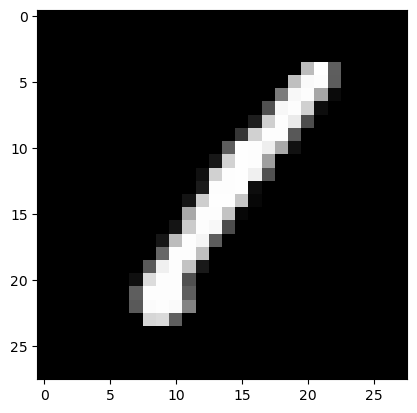

In [103]:
plt.imshow(X[0].reshape([28,28]), cmap = 'gray')

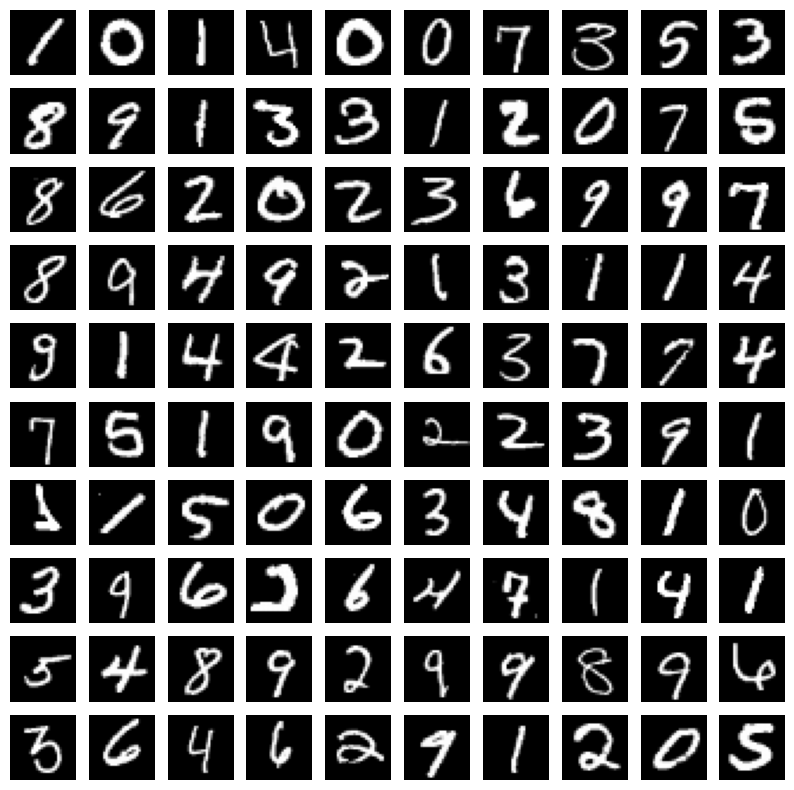

In [104]:
#to see multiple images in one
#first initialise figue
plt.figure(figsize = (10,10))
#initialise loop to show 10*10 = 100 images
for i in range(100):
    #inside this grid we want images hence subplot
    plt.subplot(10,10,1+i)
    #we will plot images
    plt.imshow(X[i].reshape([28,28]), cmap = 'gray')
    #to remove grids
    plt.axis('off')

Now before we give data to our model we need to normalise it.
So we normalise it by max spread i.e.255

In [105]:
X = X/255

In [106]:
#lets divide data train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 2)

In [107]:
print('Training image set shape: ', X_train.shape)
print('Training labels: ', y_train.shape)
print('Testing image set label: ', X_test.shape)
print('Testing labels :' , y_test.shape)

Training image set shape:  (31500, 784)
Training labels:  (31500, 1)
Testing image set label:  (10500, 784)
Testing labels : (10500, 1)


In [108]:
#Now we will train decision tree
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [109]:
pred_train = dt_classifier.predict(X_train)
pred_test = dt_classifier.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Accuracy :' , accuracy_score(y_test, pred_test))

Training Accuracy :  0.809015873015873
Testing Accuracy : 0.7927619047619048


above accuracy depends on tree depth so increase tree depth significantly but caution of overfitting

In [113]:
#let see our predicted image
#for that we will have define a function
def recognize_digit(x):
    #get predicted image and store it in a variable
    result = dt_classifier.predict(x.reshape([1,784]))
    plt.figure(figsize = (3,3))
    plt.imshow(x.reshape([28,28]))
    print('\n\n The give image is :', result)
    

In [114]:
#let pass image to our above function
recognize_digit([X_test[0]])

AttributeError: 'list' object has no attribute 'reshape'

# X_test[0].shape
shape is 784,1 hence we need to reshape it as well in our predict function